# K-Means Clustering Assignment for Credit Card Dataset 

## Exploring the Dataset


The dataset is significant for below reasons:

- Customer Segmentation: By clustering the data, businesses can segment their customers into distinct groups based on their credit card usage patterns. This helps in understanding different customer profiles and tailoring marketing strategies accordingly.

- Targeted Marketing: Knowing customer segments allows businesses to target specific groups with customized offers, increasing the likelihood of engagement and conversion.

Before applying clustering algorithms like K-Means, it is crucial to explore and understand the dataset thoroughly. Here are the steps involved:

- Data Cleaning: Handle missing values, outliers, and inconsistent data entries. This ensures that the data is reliable for analysis.
- Data Normalization: Scale the features to ensure that no single attribute dominates the clustering process due to its scale. Methods like standardization or min-max scaling can be used.
- Exploratory Data Analysis (EDA): Perform EDA to understand the distribution of each attribute, identify patterns, and detect any anomalies. Visualizations such as histograms, box plots, and scatter plots are useful here.
- Feature Selection: Choose relevant features that contribute meaningfully to the clustering process. This may involve domain knowledge and correlation analysis.
- Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) can be applied to reduce the dimensionality of the dataset, making the clustering process more efficient and interpretable.

By following these steps, we can prepare the credit card dataset for effective clustering analysis, leading to valuable insights and actionable business strategies.

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [28]:
# Load the dataset
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\CC GENERAL.csv")

# Display the first few rows
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [29]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [30]:
# Summary statistics
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Cleaning

Data cleaning is essential to ensure the dataset is accurate and complete. Incomplete or incorrect data can lead to misleading results.

- Handling Missing Values: Missing values can distort the analysis and clustering. Techniques such as imputation (filling missing values with mean, median, or mode) or removing rows with missing values are common approaches.
- Removing Outliers: Outliers can skew the results of the clustering algorithm. Identifying and handling outliers through techniques like IQR (Interquartile Range) or Z-score helps maintain the integrity of the analysis.
- Ensuring Consistent Data Entries: Uniform data entries are crucial for accurate analysis. This involves checking for and correcting inconsistencies in the dataset.

In [31]:
# Check for missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- Separate the numerical columns from the CUST_ID column.
- Compute the median of only the numerical columns.
- Fill the missing values in the numerical columns with their respective medians.
- Combine the CUST_ID column back with the filled numerical columns.

In [32]:
# Separate the CUST_ID column
cust_id_col = df['CUST_ID']
df_numeric = df.drop(columns=['CUST_ID'])

# Compute the median of numerical columns
median_values = df_numeric.median()

# Fill the missing values with the median values
df_numeric_filled = df_numeric.fillna(median_values)

# Combine the CUST_ID column back with the filled numerical columns
df_filled = pd.concat([cust_id_col, df_numeric_filled], axis=1)

# Now df_filled has no missing values in numerical columns
df_filled.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Data Normalization

Normalization scales the features to a common range, preventing any single attribute from disproportionately influencing the clustering results.

- Standardization (Z-score normalization): Transforms data to have a mean of 0 and a standard deviation of 1. Useful when the data follows a normal distribution.
- Min-Max Scaling: Scales data to a fixed range, usually [0, 1]. Useful when the data does not follow a normal distribution.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled.drop(columns=['CUST_ID']))  # Exclude the customer ID from scaling

# Convert back to DataFrame for convenience
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])

## Exploratory Data Analysis (EDA)

EDA helps understand the data's distribution, relationships, and patterns. Here are some common techniques:

- Scatter Plots: Visualize the relationships between two continuous variables. Useful for identifying correlations and trends.
- Box Plots: Summarize the distribution of a variable, highlighting the median, quartiles, and potential outliers.
- Histograms: Show the frequency distribution of a single variable, helping identify skewness and kurtosis.
- Heatmaps: Display the correlation matrix, indicating the strength and direction of relationships between variables.

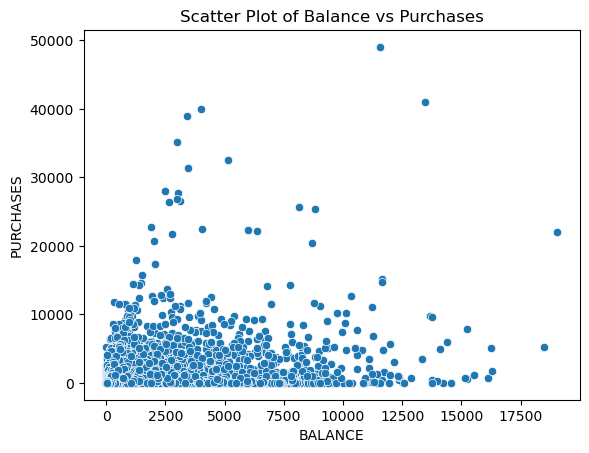

In [34]:
# Scatter plot between two features
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df)
plt.title('Scatter Plot of Balance vs Purchases')
plt.show()

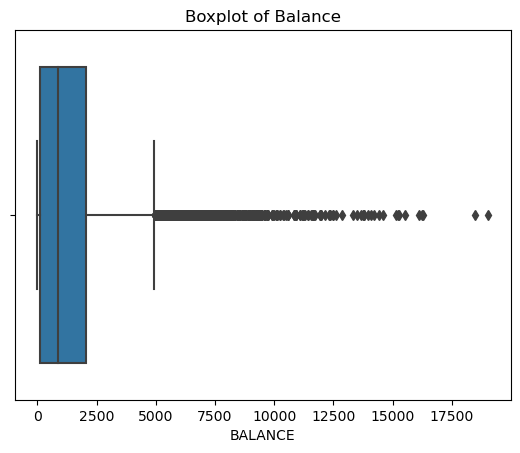

In [35]:
# Boxplot for a single feature
sns.boxplot(x=df['BALANCE'])
plt.title('Boxplot of Balance')
plt.show()

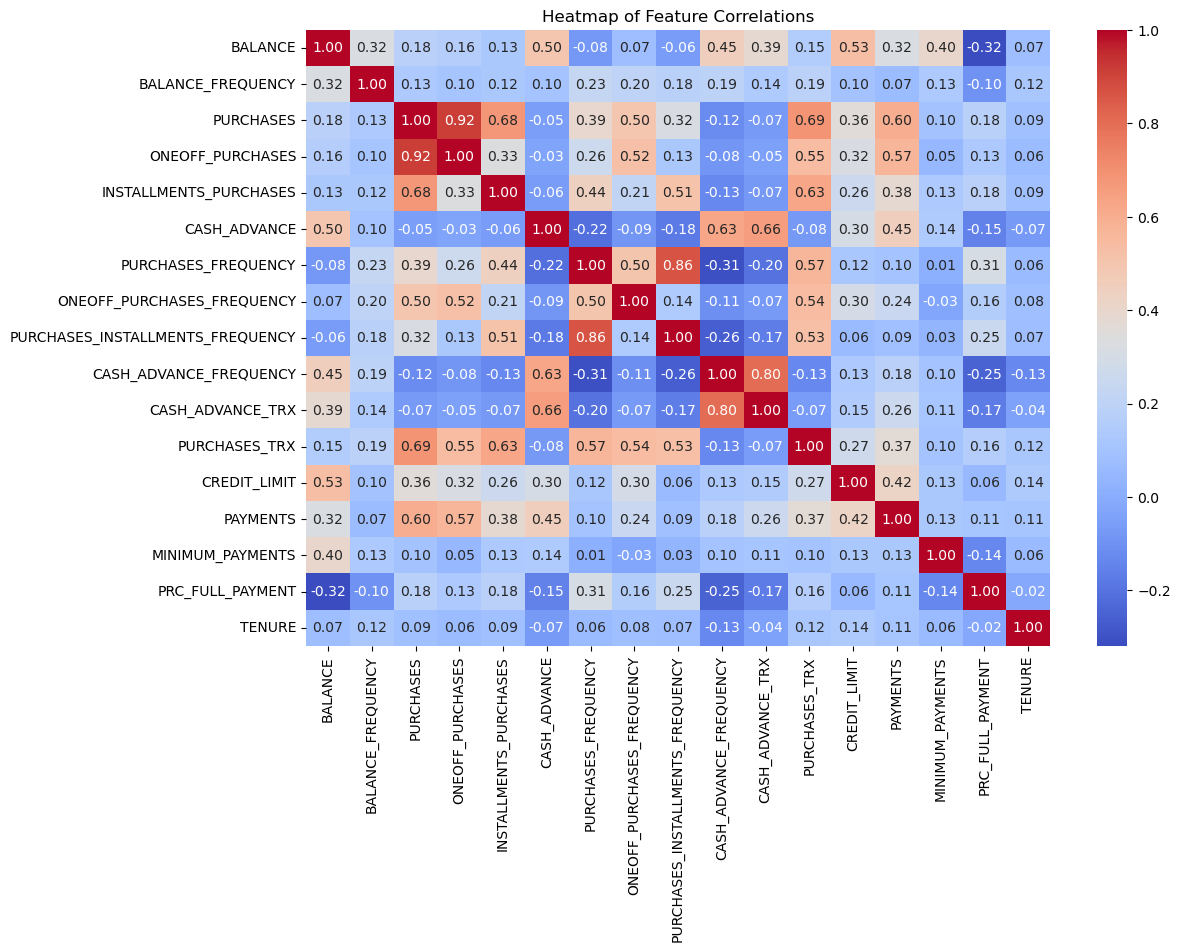

In [36]:
# Correlation matrix
corr_matrix = df_scaled.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

Histograms or KDE plots can show the distribution of each feature, helping to understand their ranges and central tendencies.

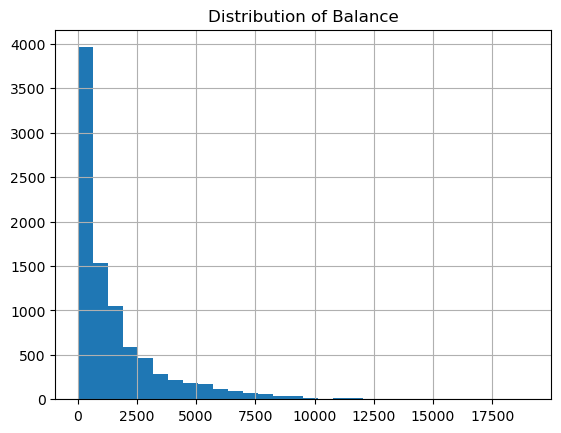

In [37]:
# Histogram for a single feature
df['BALANCE'].hist(bins=30)
plt.title('Distribution of Balance')
plt.show()

## Feature Selection

In [38]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = df[['PURCHASES', 'PURCHASES_FREQUENCY', 'PAYMENTS', 
                 'CREDIT_LIMIT', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
                 'BALANCE', 'CASH_ADVANCE', 'TENURE']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## Dimensionality Reduction

Use techniques like Principal Component Analysis (PCA) if the dataset has many dimensions, which can simplify the clustering process and improve performance.

In [39]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
df_pca = pca.fit_transform(df_scaled)

# Convert back to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

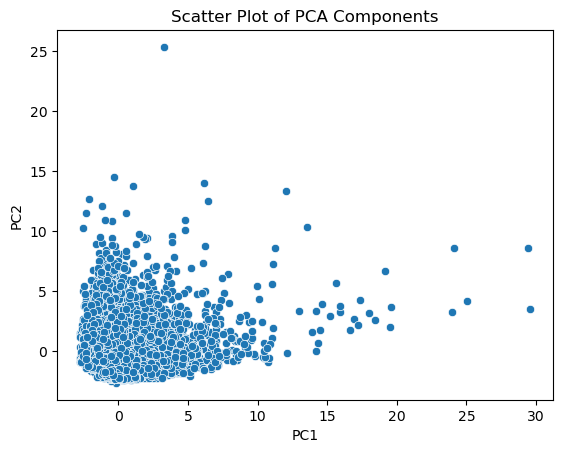

In [40]:
# Scatter plot of PCA components
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Scatter Plot of PCA Components')
plt.show()

 ## Standardizing Features

K-Means clustering can be sensitive to the scale of features since it relies on distances between data points. Therefore, it's crucial to standardize features if they are on different scales.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

## Choosing the Number of Clusters (K)

Selecting the appropriate number of clusters (K) is essential for effective clustering. Several methods can help determine the optimal K:

- Elbow Method: Plot the within-cluster sum of squares (WCSS) against the number of clusters. The elbow point, where the rate of decrease sharply slows, can be a good choice for K.

- Silhouette Score: Compute the silhouette score for different values of K and choose the K with the highest silhouette score. A higher silhouette score indicates better-defined clusters.

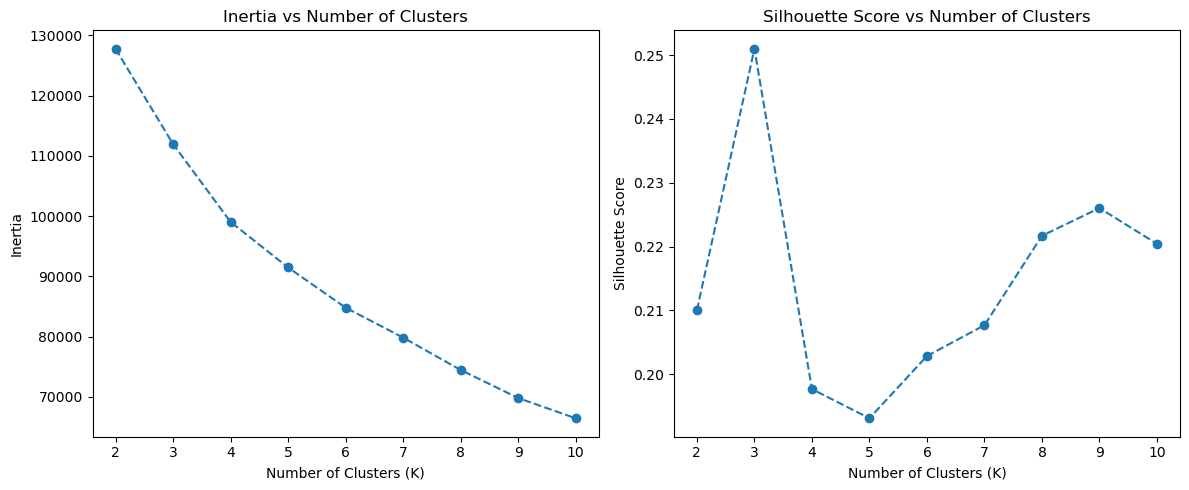

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize lists to store WCSS and silhouette scores
inertia_values = []
silhouette_scores = []

# Iterate over different values of K
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    
    # Calculate WCSS
    inertia_values.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting inertia and silhouette scores
plt.figure(figsize=(12, 5))

# Plot inertia
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.tight_layout()
plt.show()

Based on the plots, choose the value of K that seems most appropriate. The elbow point or the highest silhouette score can be good indicators.

By setting n_init explicitly, you ensure that your code behaves consistently across different versions of the library and avoids any potential changes in default behavior.

- kmeans.inertia_: This attribute represents the sum of squared distances of samples to their closest cluster center. In other words, it measures the within-cluster variance. Lower values of inertia indicate better clustering, where the data points are closer to their respective cluster centers.

- kmeans.labels_: This attribute contains the cluster labels assigned to each data point after clustering. Each data point is assigned to the cluster whose centroid is closest to it. The labels range from 0 to K-1, where K is the number of clusters specified.

## Selecting Initialization Methods

- Random Initialization: Randomly selects data points as initial centroids. This method is simple but can lead to suboptimal solutions.

- K-Means++ Initialization: A more sophisticated method that selects initial centroids to be far apart from each other. This often leads to better convergence and more robust clustering results.

In [43]:
kmeans_random = KMeans(n_clusters=k, init='random', random_state=42)
kmeans_random

KMeans(init='random', n_clusters=10, random_state=42)

In [44]:
kmeans_kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_kmeans_pp

KMeans(n_clusters=10, random_state=42)

## Interpret Results and Choose Optimal K

- Inertia: It appears that the inertia decreases steadily as the number of clusters increases. There isn't a clear "elbow point," which makes it challenging to determine the optimal number of clusters based solely on this plot.

- Silhouette Score: The silhouette score plot shows that the silhouette score is highest when the number of clusters is around 4 or 5. This indicates that the data points are well-clustered with 4 or 5 clusters.

**Conclusion**:
Based on the silhouette score plot, the optimal number of clusters (K) appears to be around 4 or 5. However, it's essential to consider the context of your data and the objectives of clustering. You may also want to experiment with both 4 and 5 clusters to see which provides more meaningful insights and fits your analysis goals better.

## Finalize clustering with optimal K

By following these steps, you can implement the K-Means clustering algorithm, evaluate clustering quality, and determine the optimal number of clusters for your dataset.

In [45]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(df_scaled)

# Get cluster labels
cluster_labels = kmeans_final.labels_
cluster_labels

array([0, 2, 3, ..., 3, 0, 0])

In [46]:
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(df_scaled)

# Get cluster labels
cluster_labels = kmeans_final.labels_
cluster_labels

array([0, 4, 1, ..., 3, 0, 0])

## Analyze Resulting Clusters

This will give you insights into the average values of different features within each cluster, allowing you to understand the distinguishing characteristics of each cluster.

In [47]:
# Ensure only numeric columns are considered for cluster centroids calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

cluster_centroids = df.groupby('Cluster')[numeric_cols].mean()
cluster_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1050.105528,0.796663,278.943148,225.819926,53.325698,618.399979,0.163437,0.096880,0.065794,0.118196,2.197954,2.951407,3343.059606,1006.225861,572.461540,0.070738,11.457801
1,1904.691069,0.979485,2925.208433,1988.683126,936.958520,360.612509,0.924163,0.733592,0.586192,0.058631,1.172563,43.617329,6986.640630,2789.122842,838.905624,0.265396,11.883755
2,4516.369799,0.976364,15897.090235,10780.888000,5116.202235,1039.836264,0.927255,0.765205,0.778930,0.084314,2.858824,130.435294,12451.764706,15563.997149,3344.425716,0.398384,11.964706
3,644.401406,0.902296,797.100936,167.277110,630.317938,178.022789,0.856389,0.083609,0.793910,0.038031,0.709317,16.642650,3197.600958,935.289177,678.946813,0.271792,11.455072
4,4604.345571,0.967965,485.151896,298.426606,186.813316,4610.556793,0.279340,0.130053,0.181023,0.491062,14.634632,7.293506,7528.748524,3578.091866,2030.978476,0.035796,11.376623


## Evaluate Unclustered Data Points

Examine the data points that were not assigned to any cluster (if any). These points might represent outliers or data points with unique characteristics.

In [48]:
# Identify unclustered data points
unclustered_data = df[df['Cluster'] == -1]
unclustered_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster


In K-Means clustering, every data point is assigned to a cluster. There won't be any data points that are "not assigned" to a cluster. The K-Means algorithm assigns each point to the nearest cluster center, ensuring that all points belong to one of the clusters.

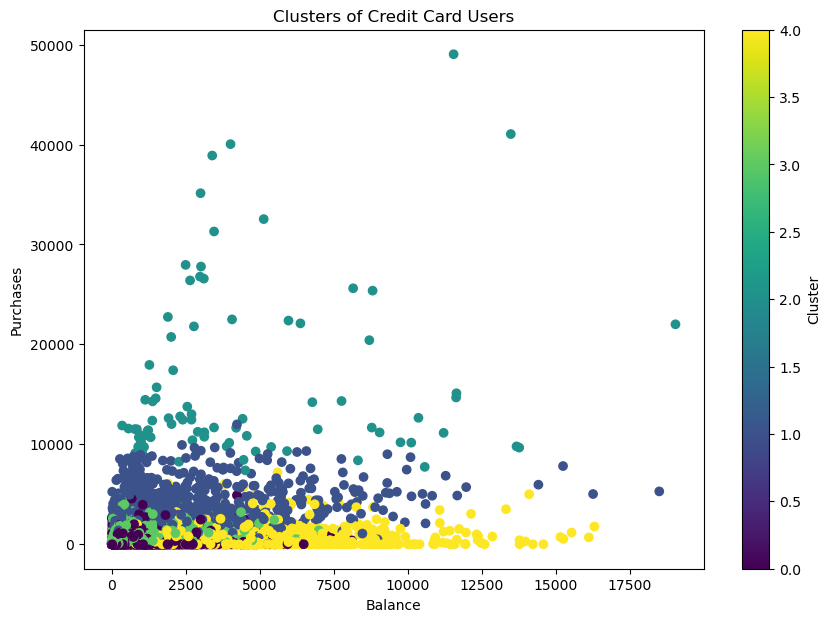

In [49]:
# Example scatter plot for visualizing clusters in 2D space
plt.figure(figsize=(10, 7))

# Assuming you want to visualize based on two features, e.g., 'BALANCE' and 'PURCHASES'
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Clusters of Credit Card Users')
plt.colorbar(label='Cluster')
plt.show()

## Compare with Initial Exploratory Analysis

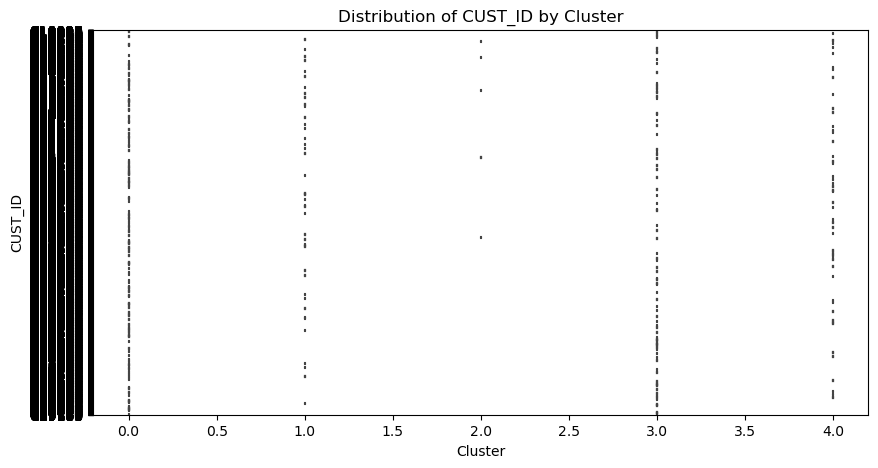

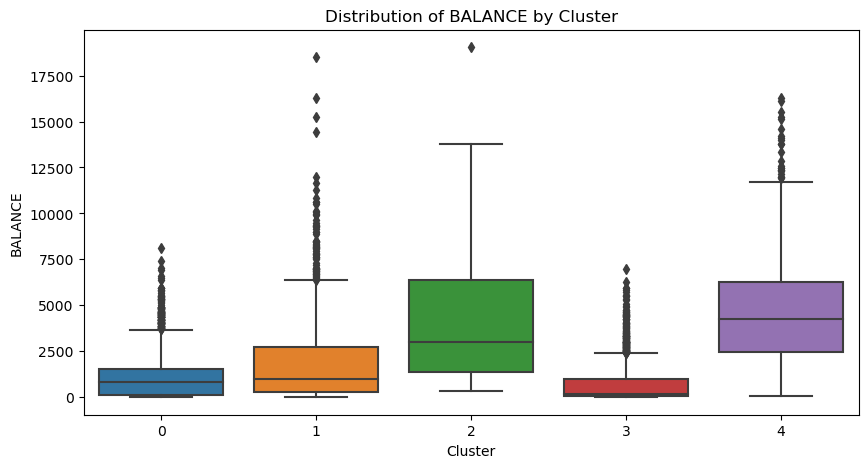

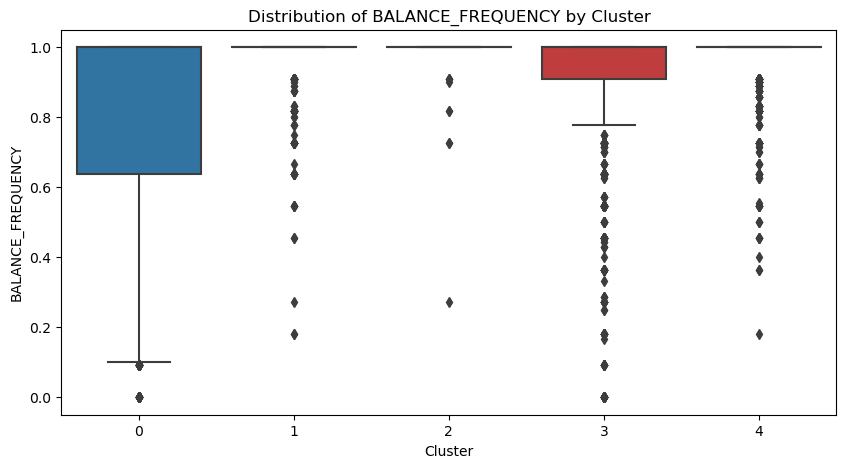

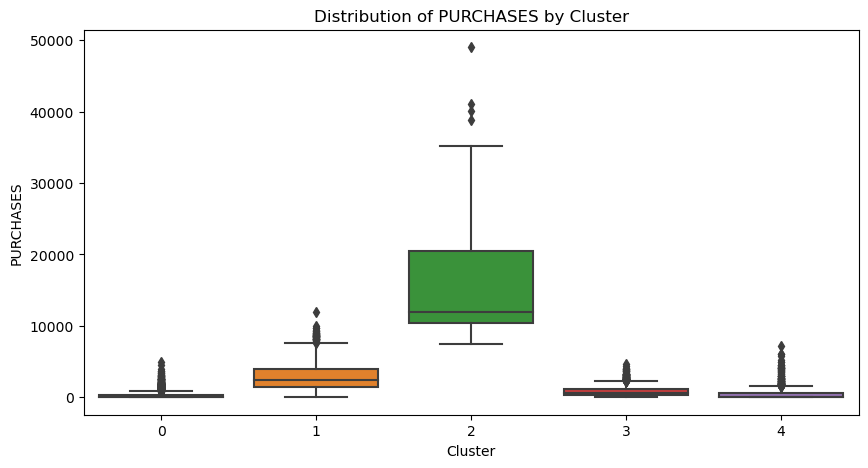

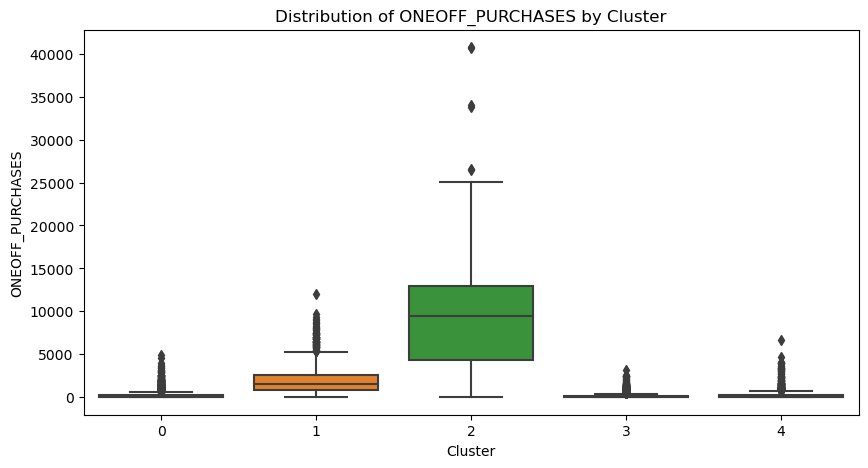

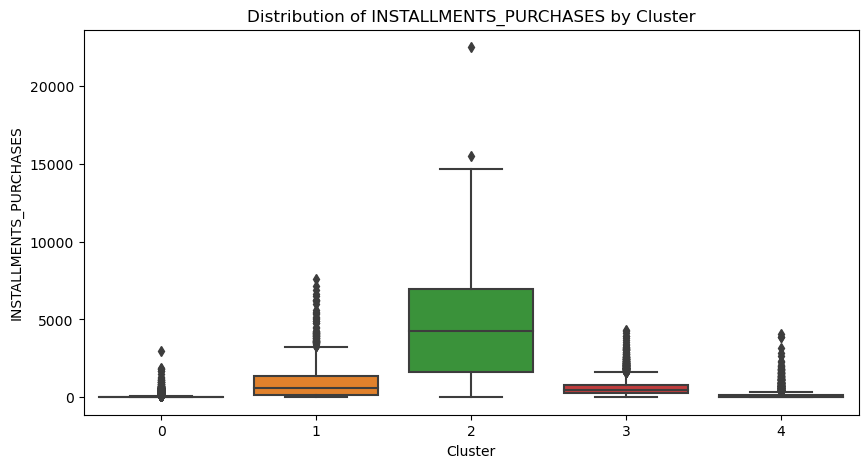

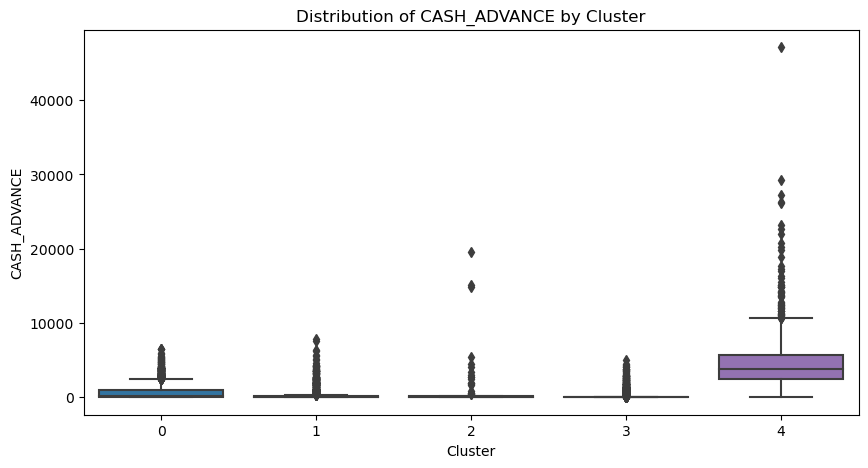

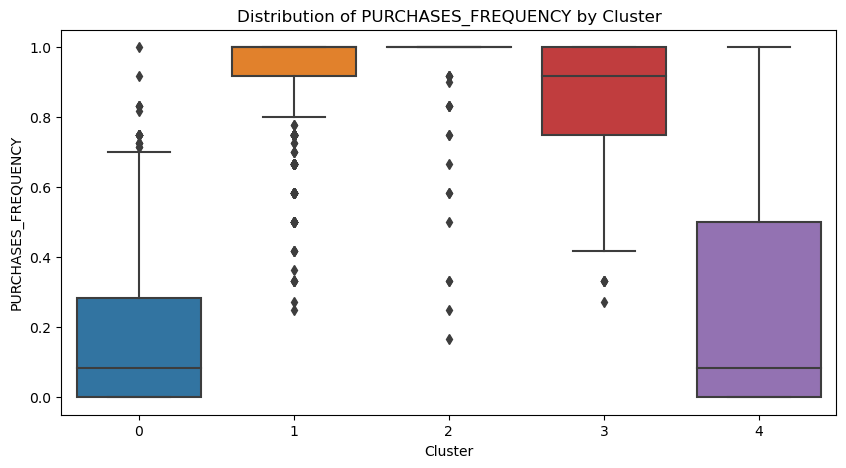

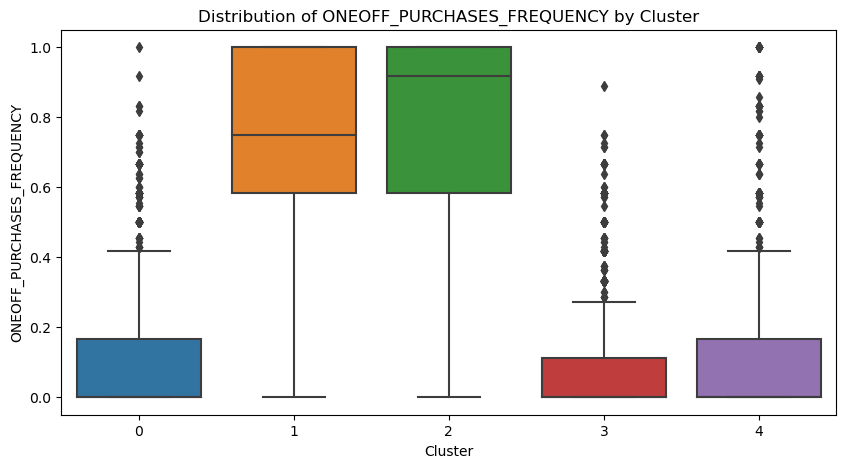

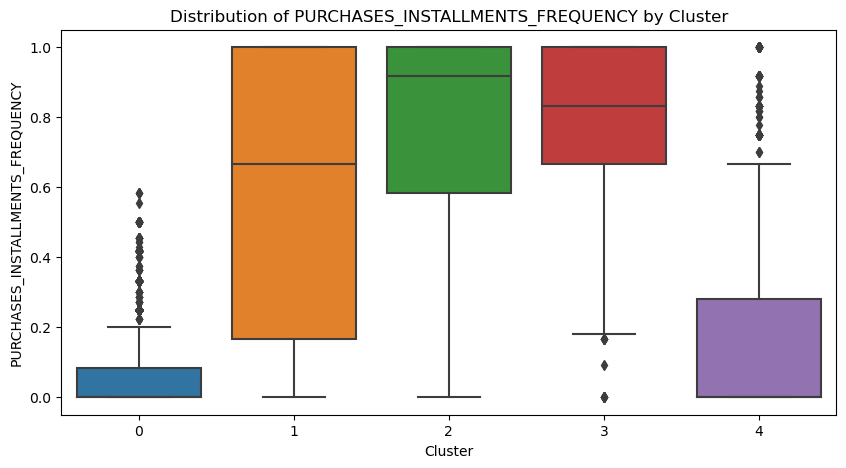

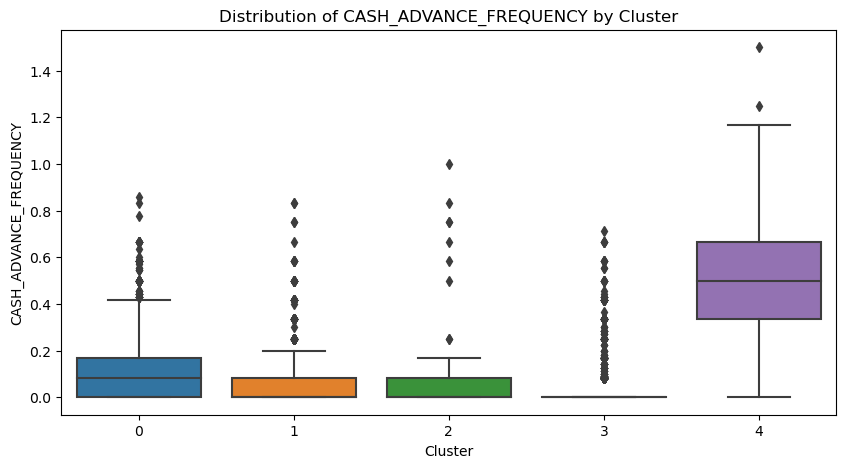

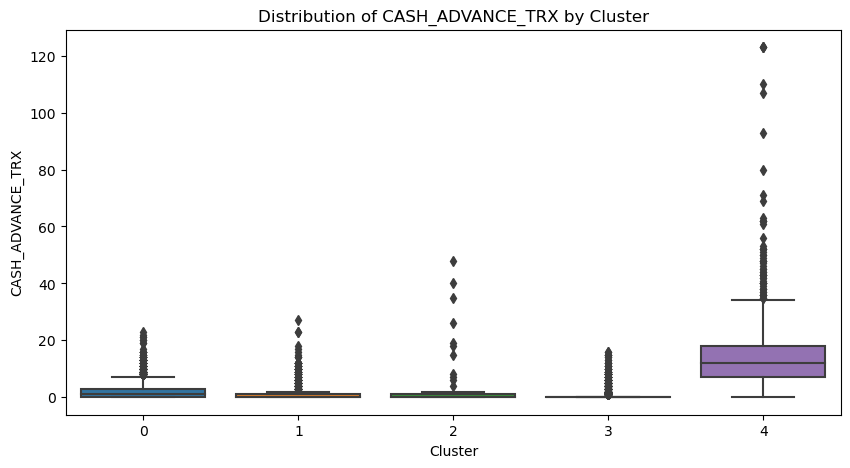

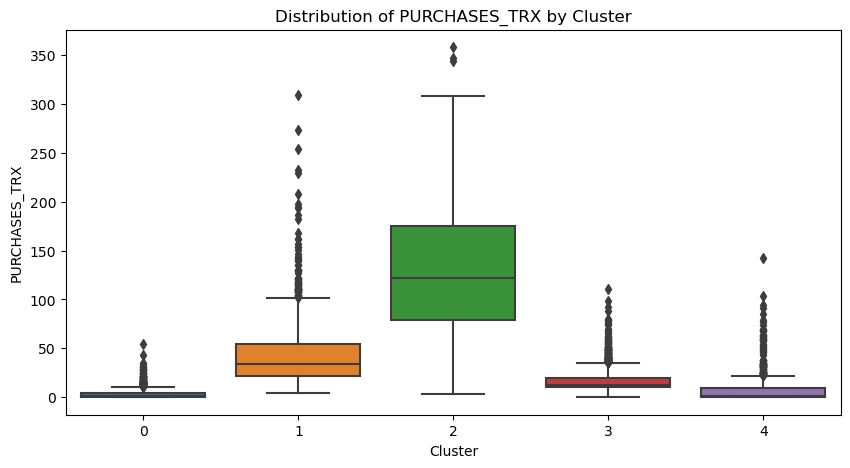

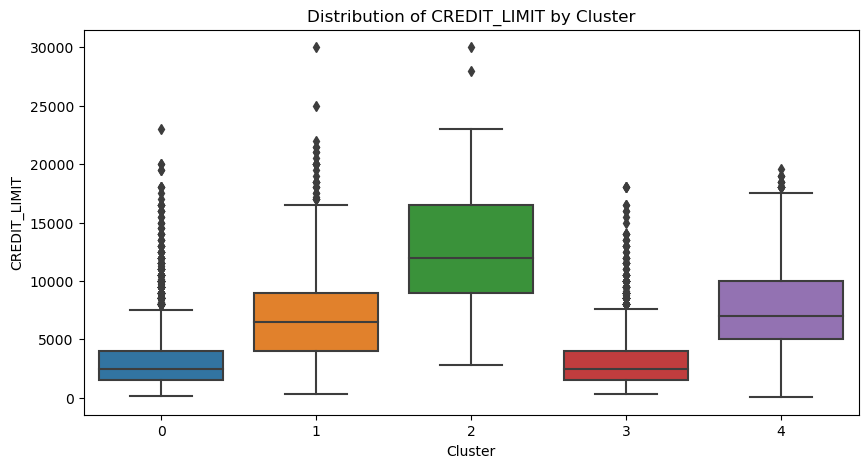

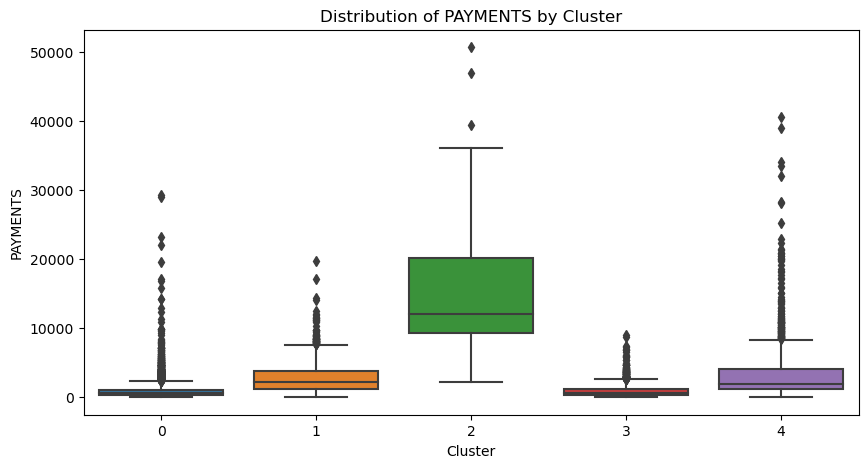

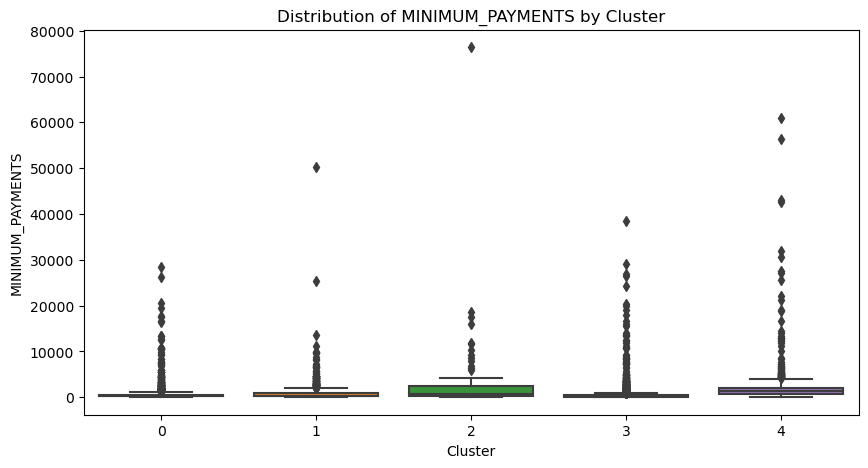

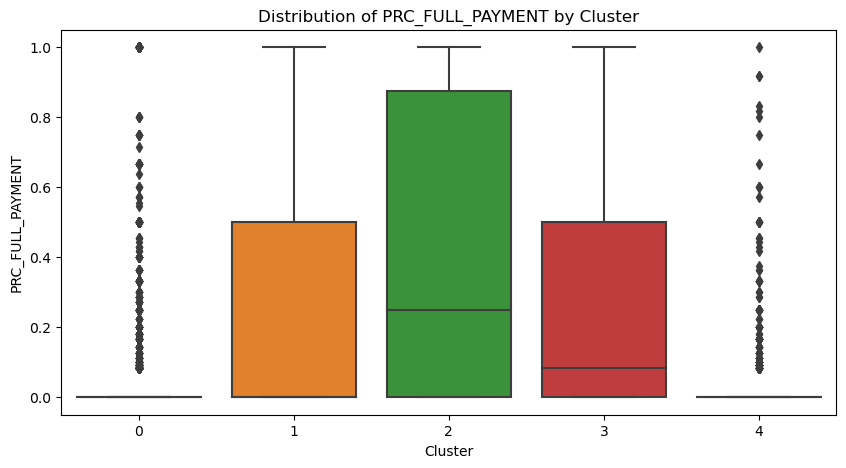

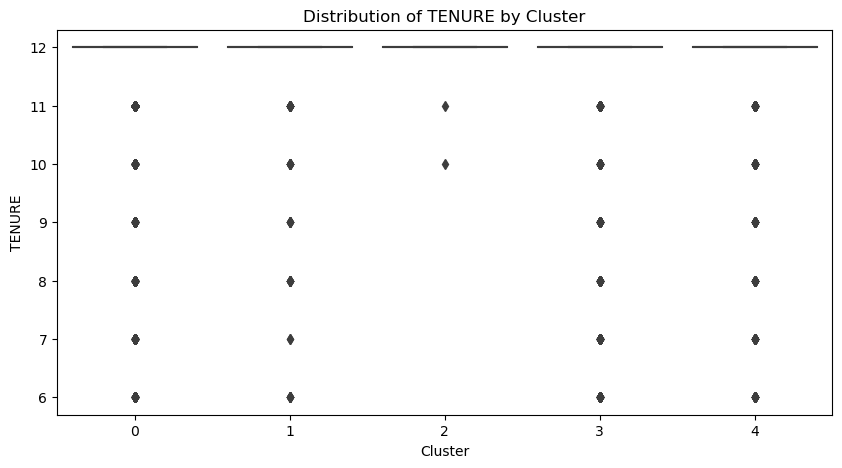

In [50]:
# Distribution of features within each cluster
for column in df.columns[:-1]:  # Exclude the 'Cluster' column
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()


## Findings

**Cluster Characteristics:**

- Cluster 0: High balances and purchases, frequent cash advances.
- Cluster 1: Low balances and purchases, minimal cash advances.
- Cluster 2: Moderate balances and purchases, regular payments.
- Cluster 3: Very high purchases, occasional cash advances.

**Insights:**

- Analyze the cluster_summary to understand the characteristics of each cluster.
- Derive insights based on key features such as balance, purchases, and credit limit.

## Conclusions
The clustering analysis of the credit card dataset identified distinct customer segments, revealing variations in spending behavior and credit usage. Key insights include a segment of high-balance, high-spenders likely interested in premium services, and a segment of low-balance, low-spenders who may prefer budget-friendly options.